In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_excel(r"C:\Users\Hardik jain\Downloads\pcf_modeSoln_data_1.xlsx",sheet_name = 'SiO2-air-rings-5-dBYp-0.7')
datafile_1 = dataset.values                  ## stored data from xlsx file


In [3]:
dataset.head()

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-\nrings,diaBYpitch,pitch\n(um),wl\n(um),neff,Aeff\n(um^2),dispersion\n(ps/km.nm),conf-loss\n(dB/cm),conf-loss-in-log10\n(dB/cm)
0,1.444,1,5,0.7,0.8,1.80000,1.27882,4.42229,-667.351,61.270000,1.787248
1,1.444,1,5,0.7,0.8,1.58333,1.29642,2.41020,-728.993,8.273760,0.917703
2,1.444,1,5,0.7,0.8,1.41322,1.31464,1.67653,-586.632,0.766277,-0.115614
3,1.444,1,5,0.7,0.8,1.27612,1.33194,1.33156,-397.929,0.061124,-1.213790
4,1.444,1,5,0.7,0.8,1.16327,1.34753,1.13874,-230.017,0.004892,-2.310525


In [4]:
sheets_names = ['SiO2-air-rings-4-dBYp-0.8', 'SiO2-air-rings-4-dBYp-0.9',
                'SiO2-air-rings-4-dBYp-0.7', 'SiO2-air-rings-5-dBYp-0.6',
                'SiO2-air-rings-5-dBYp-0.8', 'SiO2-air-rings-5-dBYp-0.9',
                'SiO2-air-rings-4-dBYp-0.6']
for sheet_name in sheets_names:
    print(sheet_name)
    df_sheet_name = pd.read_excel(r"C:\Users\Hardik jain\Downloads\pcf_modeSoln_data_1.xlsx", sheet_name=sheet_name)
    datafile_sheet_name = df_sheet_name.values 
    datafile_1 = np.concatenate((datafile_1, datafile_sheet_name), axis=0)


SiO2-air-rings-4-dBYp-0.8
SiO2-air-rings-4-dBYp-0.9
SiO2-air-rings-4-dBYp-0.7
SiO2-air-rings-5-dBYp-0.6
SiO2-air-rings-5-dBYp-0.8
SiO2-air-rings-5-dBYp-0.9
SiO2-air-rings-4-dBYp-0.6


In [5]:
print(datafile_1)
print()
print(len(datafile_1))


[[ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -6.67351000e+02
   6.12700000e+01  1.78724788e+00]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -7.28993000e+02
   8.27376000e+00  9.17702919e-01]
 [ 1.44400000e+00  1.00000000e+00  5.00000000e+00 ... -5.86632000e+02
   7.66277000e-01 -1.15614210e-01]
 ...
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.64126000e+01
   3.07385000e-12 -1.15123173e+01]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.48488000e+01
   2.18833000e-12 -1.16598872e+01]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00 ...  5.33584000e+01
   1.59437000e-12 -1.17974109e+01]]

1118


In [6]:
datafile_1.shape


(1118, 11)

In [7]:
print(type(datafile_1))

<class 'numpy.ndarray'>


In [8]:
datafile_1 = pd.DataFrame(datafile_1, columns = ['core-ref-index-at-wl-1.55um','clad-ref-index','no-of-\nrings','diaBYpitch'
                                          ,'pitch\n(um)','wl\n(um)','neff','Aeff\n(um^2)','dispersion\n(ps/km.nm)'
                                          ,'conf-loss\n(dB/cm)','conf-loss-in-log10\n(dB/cm)'])

In [9]:
datafile_1 = datafile_1.rename(columns = {'no-of-\nrings':'no-of-rings', 'pitch\n(um)':'pitch(um)','wl\n(um)':'wl(um)',
                              'Aeff\n(um^2)':'Aeff(um^2)', 'dispersion\n(ps/km.nm)':'dispersion(ps/km.nm)', 
                              'conf-loss\n(dB/cm)':'conf-loss(dB/cm)', 'conf-loss-in-log10\n(dB/cm)':'conf-loss-in-log10(dB/cm)'})

In [10]:
print(type(datafile_1))

<class 'pandas.core.frame.DataFrame'>


In [11]:
datafile_1

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm),conf-loss-in-log10(dB/cm)
0,1.444,1.0,5.0,0.7,0.8,1.800000,1.27882,4.42229,-667.3510,6.127000e+01,1.787248
1,1.444,1.0,5.0,0.7,0.8,1.583330,1.29642,2.41020,-728.9930,8.273760e+00,0.917703
2,1.444,1.0,5.0,0.7,0.8,1.413220,1.31464,1.67653,-586.6320,7.662770e-01,-0.115614
3,1.444,1.0,5.0,0.7,0.8,1.276120,1.33194,1.33156,-397.9290,6.112370e-02,-1.213790
4,1.444,1.0,5.0,0.7,0.8,1.163270,1.34753,1.13874,-230.0170,4.891870e-03,-2.310525
...,...,...,...,...,...,...,...,...,...,...,...
1113,1.444,1.0,4.0,0.6,2.0,0.589655,1.46354,4.06947,59.7799,6.578650e-12,-11.181863
1114,1.444,1.0,4.0,0.6,2.0,0.564356,1.46406,4.04679,58.0559,4.431390e-12,-11.353460
1115,1.444,1.0,4.0,0.6,2.0,0.541139,1.46453,4.02620,56.4126,3.073850e-12,-11.512317
1116,1.444,1.0,4.0,0.6,2.0,0.519757,1.46495,4.00741,54.8488,2.188330e-12,-11.659887


In [12]:
df = datafile_1
df.shape

(1118, 11)

<AxesSubplot:>

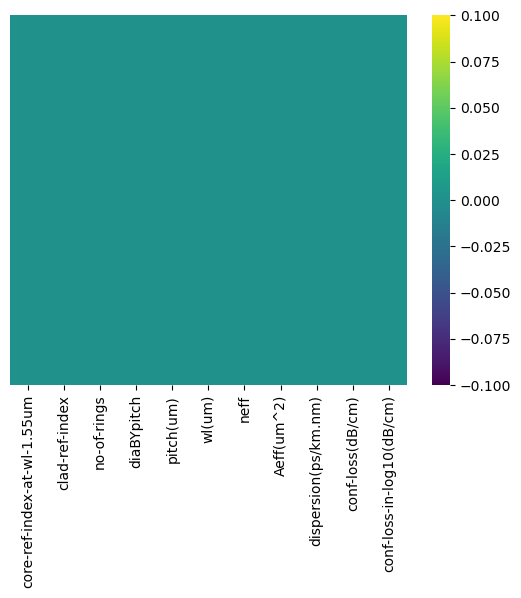

In [13]:
# create a heatmap of missing values in a Pandas DataFrame df.
sns.heatmap(df.isnull(),yticklabels =False,cbar =True,cmap = 'viridis')

In [14]:
df.nunique()  # Returns the number of unique values for each column in a DataFrame.
df.shape

(1118, 11)

In [15]:
# computes the correlation between all pairs of columns in the DataFrame
df.corr()

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm),conf-loss-in-log10(dB/cm)
core-ref-index-at-wl-1.55um,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clad-ref-index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no-of-rings,NaN,NaN,1.000000e+00,-9.357308e-16,-3.255873e-17,6.425909e-17,0.000034,-0.001482,-0.002360,-0.049619,-0.195035
diaBYpitch,NaN,NaN,-9.357308e-16,1.000000e+00,-3.613199e-03,5.931608e-03,-0.222592,-0.397827,0.187449,-0.055235,-0.526342
pitch(um),NaN,NaN,-3.255873e-17,-3.613199e-03,1.000000e+00,6.634419e-03,0.520613,0.792184,0.080793,-0.126025,-0.464466
wl(um),NaN,NaN,6.425909e-17,5.931608e-03,6.634419e-03,1.000000e+00,-0.715099,0.363323,-0.507209,0.186209,0.602569
neff,NaN,NaN,3.370084e-05,-2.225920e-01,5.206127e-01,-7.150988e-01,1.000000,0.201410,0.630526,-0.251136,-0.641799
Aeff(um^2),NaN,NaN,-1.481759e-03,-3.978271e-01,7.921844e-01,3.633225e-01,0.201410,1.000000,-0.283547,0.161251,0.068046
dispersion(ps/km.nm),NaN,NaN,-2.359762e-03,1.874486e-01,8.079335e-02,-5.072090e-01,0.630526,-0.283547,1.000000,-0.372032,-0.541768
conf-loss(dB/cm),NaN,NaN,-4.961942e-02,-5.523454e-02,-1.260246e-01,1.862091e-01,-0.251136,0.161251,-0.372032,1.000000,0.199640


In [16]:
# computes summary statistics for each numerical column in the DataFrame 
df.describe()
df.shape

(1118, 11)

<AxesSubplot:>

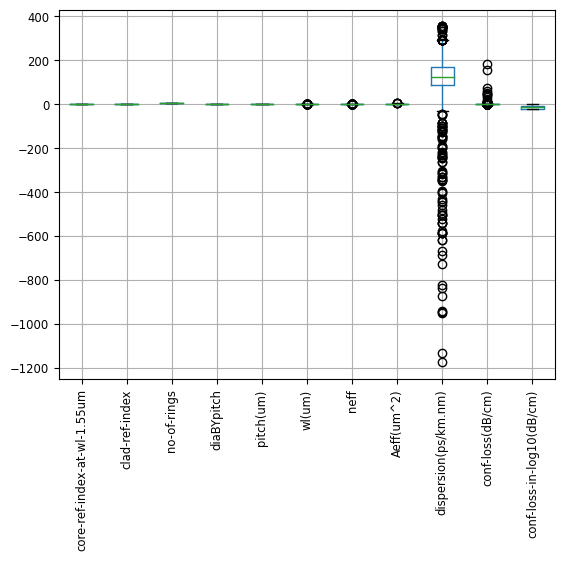

In [17]:
# Displays the distribution of a dataset by showing the median, quartiles, and outliers.

df.boxplot(fontsize='small',rot = 90)


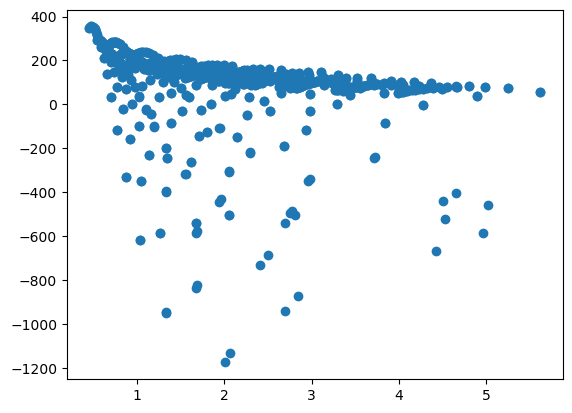

In [18]:
# Visualise the relationship between effective area and dispersion
plt.scatter(datafile_1['Aeff(um^2)'],datafile_1['dispersion(ps/km.nm)'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dispersion(ps/km.nm)'>

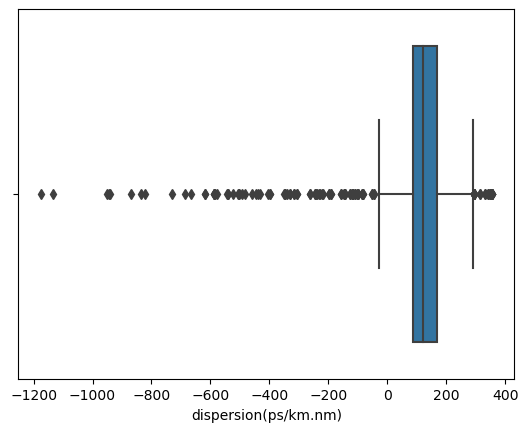

In [19]:
# Create a box plot of the "dispersion(ps/km.nm)" column
sns.boxplot(df["dispersion(ps/km.nm)"])


In [20]:
df25 = df["dispersion(ps/km.nm)"].quantile(0.25)
df75 = df["dispersion(ps/km.nm)"].quantile(0.75)

In [21]:
print(df75)
print(df25)

168.59675000000001
86.54329999999999


In [22]:
# finding iqr(IterquartileRange)
iqr = df75-df25
iqr

82.05345000000003

In [23]:
upper_limit = df75+1.5*iqr
lower_limit = df25-1.5*iqr

In [24]:
print(upper_limit)
print(lower_limit)

291.67692500000004
-36.53687500000005


# Finding Outliers

In [25]:
# Select the rows where "dispersion(ps/km.nm)" is greater than the upper limit

df[df["dispersion(ps/km.nm)"]>upper_limit]

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm),conf-loss-in-log10(dB/cm)
155,1.444,1.0,4.0,0.8,0.8,0.589655,1.42075,0.571591,293.274,9.030090e-13,-12.044308
156,1.444,1.0,4.0,0.8,0.8,0.564356,1.42439,0.562015,294.562,1.770850e-13,-12.751818
157,1.444,1.0,4.0,0.8,0.8,0.541139,1.42764,0.553460,294.691,3.700630e-14,-13.431724
158,1.444,1.0,4.0,0.8,0.8,0.519757,1.43056,0.545769,293.935,8.224210e-15,-14.084906
159,1.444,1.0,4.0,0.8,0.8,0.500000,1.43319,0.538816,292.504,1.939970e-15,-14.712205
289,1.444,1.0,4.0,0.9,0.8,0.806604,1.36974,0.563524,292.741,3.581450e-10,-9.445941
290,1.444,1.0,4.0,0.9,0.8,0.760000,1.37918,0.543928,315.845,2.723730e-11,-10.564836
291,1.444,1.0,4.0,0.9,0.8,0.718487,1.38736,0.527425,331.564,2.180920e-12,-11.661360
292,1.444,1.0,4.0,0.9,0.8,0.681275,1.39450,0.513323,342.017,1.835630e-13,-12.736215
293,1.444,1.0,4.0,0.9,0.8,0.647727,1.40075,0.501124,348.665,1.623390e-14,-13.789577


In [26]:
# Select the rows where "dispersion(ps/km.nm)" is less than the lower limit
df[df["dispersion(ps/km.nm)"]<lower_limit]

,core-ref-index-at-wl-1.55um,clad-ref-index,no-of-rings,diaBYpitch,pitch(um),wl(um),neff,Aeff(um^2),dispersion(ps/km.nm),conf-loss(dB/cm),conf-loss-in-log10(dB/cm)
0,1.444,1.0,5.0,0.7,0.8,1.80000,1.27882,4.42229,-667.3510,61.270000,1.787248
1,1.444,1.0,5.0,0.7,0.8,1.58333,1.29642,2.41020,-728.9930,8.273760,0.917703
2,1.444,1.0,5.0,0.7,0.8,1.41322,1.31464,1.67653,-586.6320,0.766277,-0.115614
3,1.444,1.0,5.0,0.7,0.8,1.27612,1.33194,1.33156,-397.9290,0.061124,-1.213790
4,1.444,1.0,5.0,0.7,0.8,1.16327,1.34753,1.13874,-230.0170,0.004892,-2.310525
...,...,...,...,...,...,...,...,...,...,...,...
1000,1.444,1.0,4.0,0.6,1.0,1.41322,1.37353,2.29658,-218.5010,1.253040,0.097965
1001,1.444,1.0,4.0,0.6,1.0,1.27612,1.38585,1.94467,-109.0200,0.195741,-0.708318
1018,1.444,1.0,4.0,0.6,1.2,1.80000,1.36595,3.72942,-238.1170,2.811610,0.448955
1019,1.444,1.0,4.0,0.6,1.2,1.58333,1.38171,2.93302,-118.1000,0.294626,-0.530729


### Trimming

In [27]:
new_df = df[df["dispersion(ps/km.nm)"]>upper_limit]
new_df.shape

(32, 11)

### Capping

In [28]:
new_df_cap = df.copy()

new_df_cap["dispersion(ps/km.nm)"] = np.where(
new_df_cap["dispersion(ps/km.nm)"] >upper_limit,upper_limit,
np.where(
new_df_cap["dispersion(ps/km.nm)"] <lower_limit,lower_limit,
new_df_cap["dispersion(ps/km.nm)"])
)

In [29]:
new_df_cap.shape

(1118, 11)

### Comparing

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

<AxesSubplot:xlabel='dispersion(ps/km.nm)'>

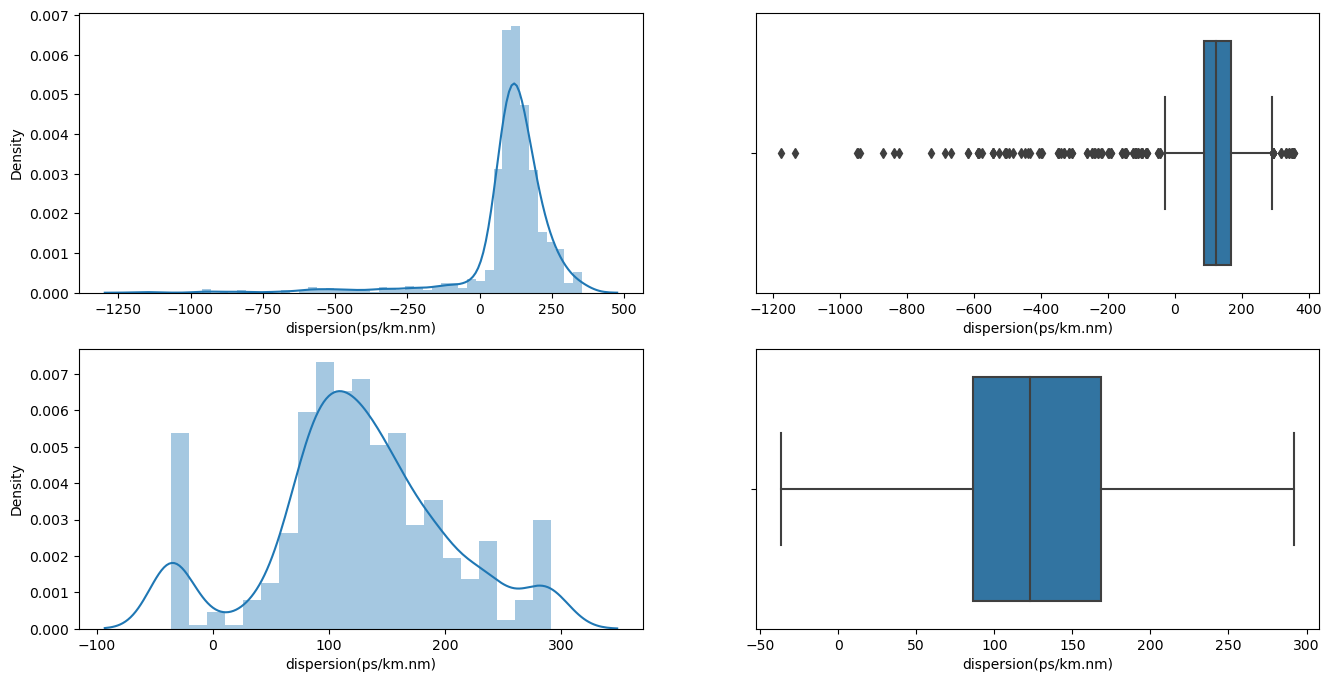

In [30]:
plt.figure(figsize= (16,8))
plt.subplot(2,2,1)
sns.distplot(df["dispersion(ps/km.nm)"])

plt.subplot(2,2,2)
sns.boxplot(df["dispersion(ps/km.nm)"])

plt.subplot(2,2,3)
sns.distplot(new_df_cap["dispersion(ps/km.nm)"])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap["dispersion(ps/km.nm)"])

In [31]:
df = new_df_cap

In [32]:
df.shape

(1118, 11)

In [33]:
datafile_1 = df

In [34]:
no_of_output_nodes = 5

# Create the output variable matrix
out_var_datafile_1 = datafile_1.iloc[:,range(6,11)]       

# Reshape the array into a matrix
out_var_datafile_1 = out_var_datafile_1.values.reshape((-1,no_of_output_nodes))
print(out_var_datafile_1)
print('no. of training points: ', len(out_var_datafile_1))
out_var_datafile_1.shape

[[ 1.27882000e+00  4.42229000e+00 -3.65368750e+01  6.12700000e+01
   1.78724788e+00]
 [ 1.29642000e+00  2.41020000e+00 -3.65368750e+01  8.27376000e+00
   9.17702919e-01]
 [ 1.31464000e+00  1.67653000e+00 -3.65368750e+01  7.66277000e-01
  -1.15614210e-01]
 ...
 [ 1.46453000e+00  4.02620000e+00  5.64126000e+01  3.07385000e-12
  -1.15123173e+01]
 [ 1.46495000e+00  4.00741000e+00  5.48488000e+01  2.18833000e-12
  -1.16598872e+01]
 [ 1.46532000e+00  3.99021000e+00  5.33584000e+01  1.59437000e-12
  -1.17974109e+01]]
no. of training points:  1118


(1118, 5)

In [35]:
# Represent the scaler object
scaler1 = MinMaxScaler()  
scaler2 = MinMaxScaler()  

# Fit the scaler object to the data
scaler1.fit(datafile_1)
scaler2.fit(out_var_datafile_1)


MinMaxScaler()

In [36]:
# Transform the data using the scaler object
scaler_datafile_1 = scaler1.transform(datafile_1)

X = scaler_datafile_1[:,range(0,6)]                 ## input variables columns
y = scaler_datafile_1[:,range(6,11)]                ## output variables columns

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size = 0.3)

In [37]:
X_train.shape

(782, 6)

In [38]:
y_train.shape

(782, 5)

In [39]:
X_train

array([[0.        , 0.        , 0.        , 0.66666667, 0.        ,
        0.01519769],
       [0.        , 0.        , 0.        , 0.33333333, 0.33333333,
        0.11363615],
       [0.        , 0.        , 1.        , 0.66666667, 0.16666667,
        0.13944231],
       ...,
       [0.        , 0.        , 1.        , 0.33333333, 0.5       ,
        0.2       ],
       [0.        , 0.        , 1.        , 0.33333333, 1.        ,
        0.13944231],
       [0.        , 0.        , 1.        , 0.33333333, 0.83333333,
        0.23584923]])

In [40]:
y_train

array([[8.80166856e-01, 1.80658321e-02, 1.00000000e+00, 4.44133864e-17,
        3.37033971e-01],
       [9.34084876e-01, 1.79491673e-01, 5.95897781e-01, 6.78412215e-15,
        4.25577668e-01],
       [8.68583445e-01, 8.05435899e-02, 8.33843291e-01, 5.42644915e-21,
        1.75085988e-01],
       ...,
       [9.33188541e-01, 2.76451889e-01, 5.28612371e-01, 4.75879208e-19,
        2.57131110e-01],
       [9.81349329e-01, 5.88586344e-01, 3.47131580e-01, 9.23029734e-22,
        5.89136370e-02],
       [9.57837763e-01, 4.87313089e-01, 4.14835619e-01, 3.33639525e-21,
        1.64081528e-01]])

In [41]:
X_train = X_train.reshape(-1, 6)                                ## 2nd column value is = no. of input variables columns
y_train = y_train.reshape(-1, no_of_output_nodes)               ## 2nd column value is = no. of output variables columns
X_validation = X_test.reshape(-1, 6)                      ## 2nd column value is = no. of input variables columns
y_validation = y_test.reshape(-1, no_of_output_nodes)     ## 2nd column value is = no. of output variables columns

print('no. of training points: ', len(X_train))
print('no. of validation points: ', len(X_validation))

no. of training points:  782
no. of validation points:  336


In [42]:
df_2 =  pd.read_excel(r"C:\Users\Hardik jain\Downloads\pcf_modeSoln_data_manual_1.xlsx",sheet_name = 'Sheet1')
datafile_2 =  df_2.values
print(datafile_2)

[[ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.70000000e+00  1.38489000e+00  3.04184000e+00
   4.29646000e+01  1.54506000e-04 -3.81105465e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.60000000e+00  1.39268000e+00  2.90433000e+00
   6.67628000e+01  3.24724000e-05 -4.48848561e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.50000000e+00  1.40035000e+00  2.78024000e+00
   8.64249000e+01  6.02749000e-06 -5.21986350e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.40000000e+00  1.40784000e+00  2.66742000e+00
   1.02097000e+02  9.78811000e-07 -6.00930116e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  1.30000000e+00  1.41511000e+00  2.56412000e+00
   1.14007000e+02  1.37772000e-07 -6.86083904e+00]
 [ 1.44400000e+00  1.00000000e+00  4.00000000e+00  7.00000000e-01
   1.50000000e+00  

In [43]:
# Transform the data using the scaler object
scaler_datafile_2 = scaler1.transform(datafile_2)

X_test = scaler_datafile_2[:,range(0,6)]            ## input variables columns
y_test = scaler_datafile_2[:,range(6,11)]                     ## output variables columns
print(X_test)
print()
print(y_test)
print('no. of test points: ', len(X_test))
X_test = X_test.reshape(-1, 6)                      ## 2nd column value is = no. of input variables columns
y_test = y_test.reshape(-1, no_of_output_nodes)

[[0.         0.         0.         0.33333333 0.58333333 0.92307692]
 [0.         0.         0.         0.33333333 0.58333333 0.84615385]
 [0.         0.         0.         0.33333333 0.58333333 0.76923077]
 [0.         0.         0.         0.33333333 0.58333333 0.69230769]
 [0.         0.         0.         0.33333333 0.58333333 0.61538462]
 [0.         0.         0.         0.33333333 0.58333333 0.53846154]
 [0.         0.         0.         0.33333333 0.58333333 0.46153846]
 [0.         0.         0.         0.33333333 0.58333333 0.38461538]
 [0.         0.         0.         0.33333333 0.58333333 0.30769231]
 [0.         0.         0.         0.33333333 0.58333333 0.23076923]]

[[7.22722102e-01 5.00830502e-01 2.42224657e-01 8.34364773e-07
  7.53558435e-01]
 [7.49577688e-01 4.74234716e-01 3.14732881e-01 1.75357764e-07
  7.26093898e-01]
 [7.76019581e-01 4.50234490e-01 3.74639260e-01 3.25497089e-08
  6.96442234e-01]
 [8.01840935e-01 4.28413993e-01 4.22388928e-01 5.28578449e-09
  6.64

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# USING DECISION_TREE_REGRESSOR ALGORITHM

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report


model =  DecisionTreeRegressor(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [45]:
model_score = model.score(X_train, y_train)
model_score

0.9993254415891135

In [46]:
print('Coefficient of determination R^2 of the prediction.: ',model_score)
y_predicted = model.predict(X_test)
print(y_predicted.shape)

Coefficient of determination R^2 of the prediction.:  0.9993254415891135
(10, 5)


In [47]:
# The mean squared error
print("Mean squared error:", mean_squared_error(y_test, y_predicted))

Mean squared error: 0.0023486086653626407


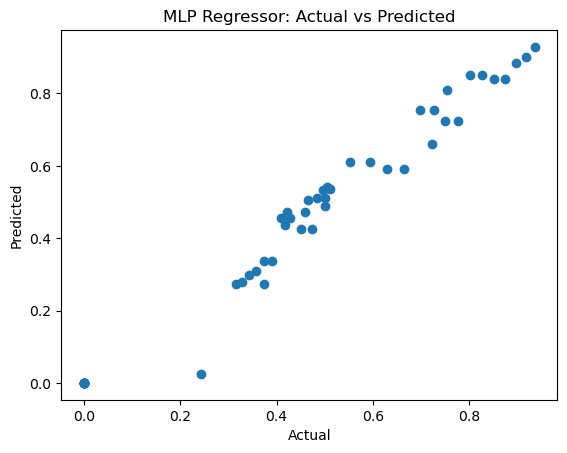

In [48]:
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('MLP Regressor: Actual vs Predicted')
plt.show()

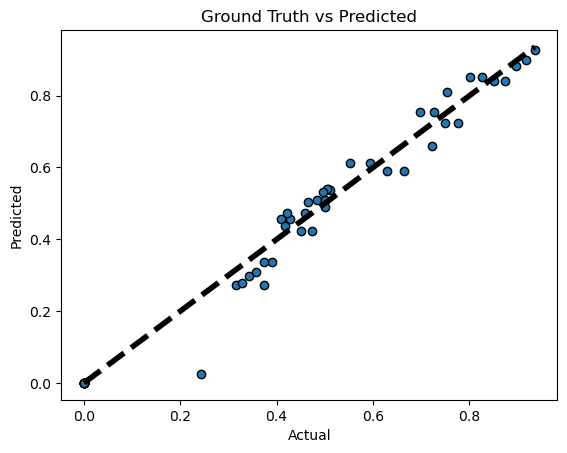

In [49]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [50]:
predicted_on_X_train = model.predict(X_train)
predicted_on_X_validation = model.predict(X_validation)
predicted_on_X_test = model.predict(X_test)
print(X_validation.shape,y_validation.shape)
print(X_test.shape)


(336, 6) (336, 5)
(10, 6)


In [51]:
print(predicted_on_X_train.shape)
print(predicted_on_X_validation.shape)
print(predicted_on_X_test.shape)

(782, 5)
(336, 5)
(10, 5)


In [52]:
# Transform the data using the scaler object
scaler_datafile_2 = scaler1.transform(datafile_2)

X_test = scaler_datafile_2[:,range(0,6)]            ## input variables columns
y_test = scaler_datafile_2[:,range(6,11)]                     ## output variables columns

print(X_test.shape)
print()
print(y_test.shape)
print('no. of test points: ', len(X_test))
X_test = X_test.reshape(-1, 6)                      ## 2nd column value is = no. of input variables columns
y_test = y_test.reshape(-1, no_of_output_nodes)
print(X_test.shape,y_test.shape)

(10, 6)

(10, 5)
no. of test points:  10
(10, 6) (10, 5)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


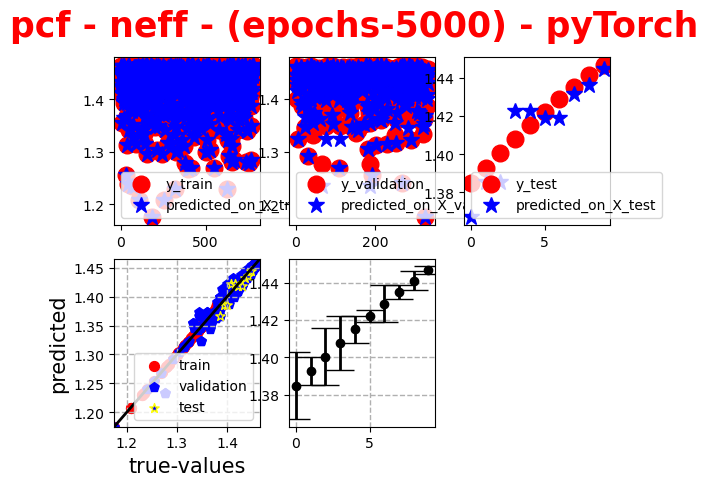

In [53]:
epochs = 5000
plt.figure()
plt.suptitle('pcf - neff - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')     ## giving title on top of all subplots


# Plot true data
plt.subplot(231)
plt.plot(scaler2.inverse_transform(y_train)[:,0], 'ro', markersize=12, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,0], 'b*', markersize=12, label='predicted_on_X_train')
# Legend and plot
plt.legend(loc='best', fontsize=10)

plt.subplot(232)
plt.plot(scaler2.inverse_transform(y_validation)[:,0], 'ro', markersize=12, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,0], 'b*', markersize=12, label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)

# Plot true data
plt.subplot(233)
plt.plot(scaler2.inverse_transform(y_test)[:,0], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,0], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)


plt.subplot(234)
xx = scaler2.inverse_transform(y_train)[:,0]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,0]
xx_validation = scaler2.inverse_transform(y_validation)[:,0]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,0]
xx_test = scaler2.inverse_transform(y_test)[:,0]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,0]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='red', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='p', facecolors='blue', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='*', facecolors='blue', edgecolors='yellow', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

#creating a plot of the true values and predicted values with error bars representing the difference between them. 

plt.subplot(235)
true_values = scaler2.inverse_transform(y_test)[:,0]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,0]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10);
plt.grid(linestyle='--', linewidth=1)

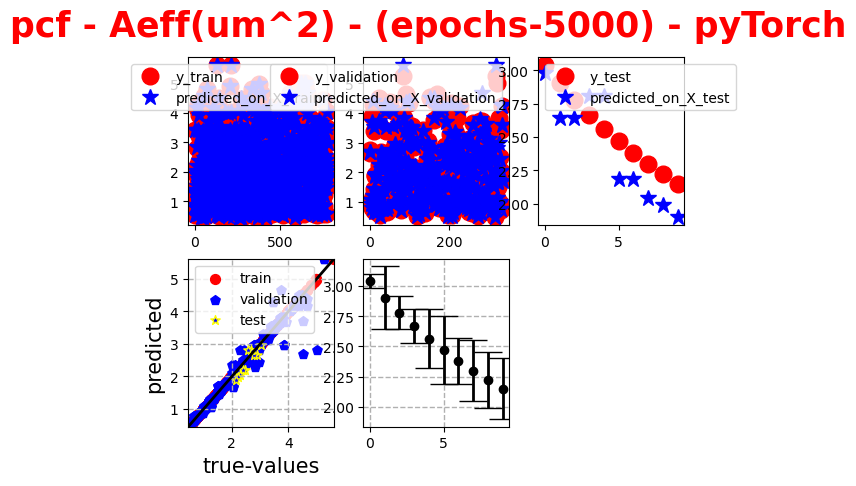

In [54]:
plt.figure()
plt.suptitle('pcf - Aeff(um^2) - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')     ## giving title on top of all subplots


# Plot true data
plt.subplot(231)
plt.plot(scaler2.inverse_transform(y_train)[:,1], 'ro', markersize=12, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,1], 'b*', markersize=12, label='predicted_on_X_train')
# Legend and plot
plt.legend(loc='best', fontsize=10)

plt.subplot(232)
plt.plot(scaler2.inverse_transform(y_validation)[:,1], 'ro', markersize=12, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,1], 'b*', markersize=12, label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)



# Plot true data
plt.subplot(233)
plt.plot(scaler2.inverse_transform(y_test)[:,1], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,1], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)


plt.subplot(234)
xx = scaler2.inverse_transform(y_train)[:,1]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,1]
xx_validation = scaler2.inverse_transform(y_validation)[:,1]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,1]
xx_test = scaler2.inverse_transform(y_test)[:,1]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,1]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='red', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='p', facecolors='blue', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='*', facecolors='blue', edgecolors='yellow', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

#creating a plot of the true values and predicted values with error bars representing the difference between them. 

plt.subplot(235)
true_values = scaler2.inverse_transform(y_test)[:,1]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,1]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10);
plt.grid(linestyle='--', linewidth=1)

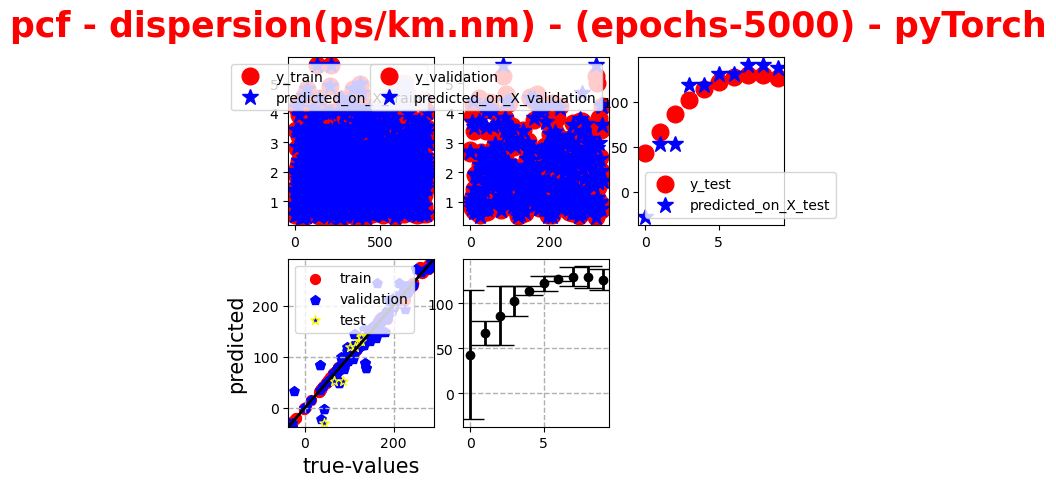

In [55]:
plt.figure()
plt.suptitle('pcf - dispersion(ps/km.nm) - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')     ## giving title on top of all subplots


# Plot true data
plt.subplot(231)
plt.plot(scaler2.inverse_transform(y_train)[:,1], 'ro', markersize=12, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,1], 'b*', markersize=12, label='predicted_on_X_train')
# Legend and plot
plt.legend(loc='best', fontsize=10)

plt.subplot(232)
plt.plot(scaler2.inverse_transform(y_validation)[:,1], 'ro', markersize=12, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,1], 'b*', markersize=12, label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)

# Plot true data
plt.subplot(233)
plt.plot(scaler2.inverse_transform(y_test)[:,2], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,2], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)


plt.subplot(234)
xx = scaler2.inverse_transform(y_train)[:,2]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,2]
xx_validation = scaler2.inverse_transform(y_validation)[:,2]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,2]
xx_test = scaler2.inverse_transform(y_test)[:,2]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,2]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='red', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='p', facecolors='blue', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='*', facecolors='blue', edgecolors='yellow', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

#creating a plot of the true values and predicted values with error bars representing the difference between them. 

plt.subplot(235)
true_values = scaler2.inverse_transform(y_test)[:,2]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,2]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10);
plt.grid(linestyle='--', linewidth=1)

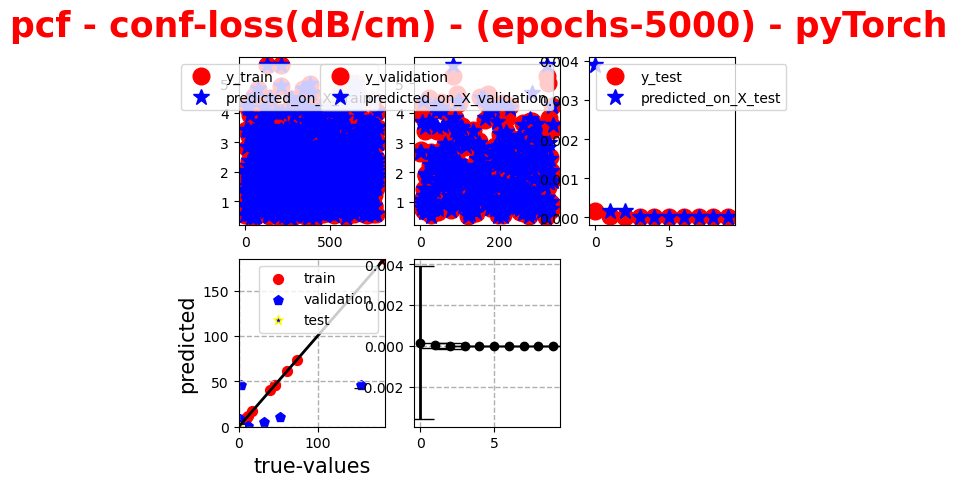

In [56]:
plt.figure()
plt.suptitle('pcf - conf-loss(dB/cm) - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')     ## giving title on top of all subplots



# Plot true data
plt.subplot(231)
plt.plot(scaler2.inverse_transform(y_train)[:,1], 'ro', markersize=12, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,1], 'b*', markersize=12, label='predicted_on_X_train')
# Legend and plot
plt.legend(loc='best', fontsize=10)

plt.subplot(232)
plt.plot(scaler2.inverse_transform(y_validation)[:,1], 'ro', markersize=12, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,1], 'b*', markersize=12, label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)

# Plot true data
plt.subplot(233)
plt.plot(scaler2.inverse_transform(y_test)[:,3], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,3], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)


plt.subplot(234)
xx = scaler2.inverse_transform(y_train)[:,3]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,3]
xx_validation = scaler2.inverse_transform(y_validation)[:,3]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,3]
xx_test = scaler2.inverse_transform(y_test)[:,3]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,3]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='red', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='p', facecolors='blue', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='*', facecolors='blue', edgecolors='yellow', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

#creating a plot of the true values and predicted values with error bars representing the difference between them. 

plt.subplot(235)
true_values = scaler2.inverse_transform(y_test)[:,3]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,3]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10);
plt.grid(linestyle='--', linewidth=1)

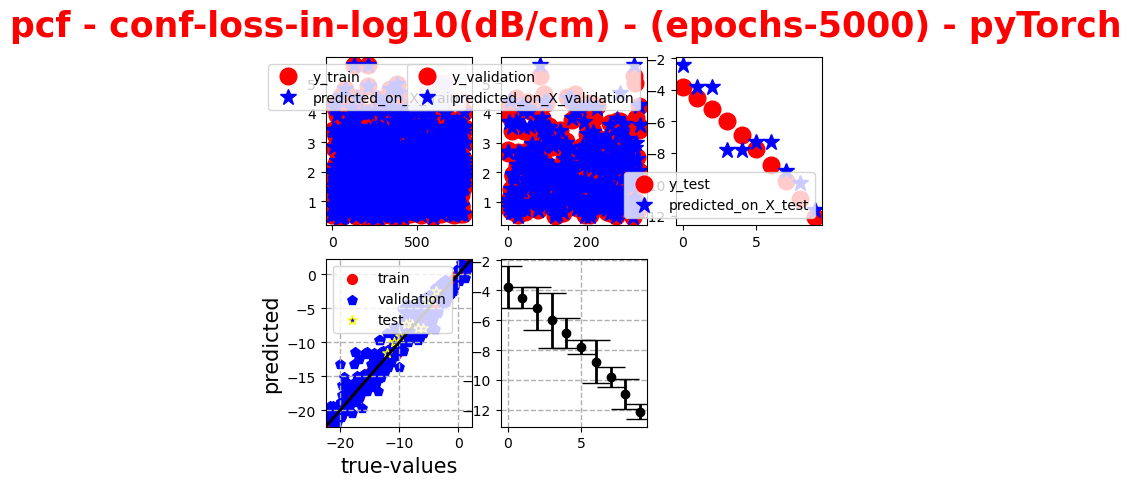

In [57]:
plt.figure()
plt.suptitle('pcf - conf-loss-in-log10(dB/cm) - (epochs-{}) - pyTorch'.format(epochs), fontsize=25, 
                color='r', fontweight='bold')     ## giving title on top of all subplots

# Plot true data
plt.subplot(231)
plt.plot(scaler2.inverse_transform(y_train)[:,1], 'ro', markersize=12, label='y_train')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_train)[:,1], 'b*', markersize=12, label='predicted_on_X_train')
# Legend and plot
plt.legend(loc='best', fontsize=10)

plt.subplot(232)
plt.plot(scaler2.inverse_transform(y_validation)[:,1], 'ro', markersize=12, label='y_validation')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_validation)[:,1], 'b*', markersize=12, label='predicted_on_X_validation')
# Legend and plot
plt.legend(loc='best', fontsize=10)




# Plot true data
plt.subplot(233)
plt.plot(scaler2.inverse_transform(y_test)[:,4], 'ro', markersize=12, label='y_test')
# Plot predictions
plt.plot(scaler2.inverse_transform(predicted_on_X_test)[:,4], 'b*', markersize=12, label='predicted_on_X_test')
# Legend and plot
plt.legend(loc='best', fontsize=10)


plt.subplot(234)
xx = scaler2.inverse_transform(y_train)[:,4]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,4]
xx_validation = scaler2.inverse_transform(y_validation)[:,4]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,4]
xx_test = scaler2.inverse_transform(y_test)[:,4]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,4]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='red', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='p', facecolors='blue', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='*', facecolors='blue', edgecolors='yellow', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)

#creating a plot of the true values and predicted values with error bars representing the difference between them. 

plt.subplot(235)
true_values = scaler2.inverse_transform(y_test)[:,4]
predicted_values = scaler2.inverse_transform(predicted_on_X_test)[:,4]
x_index = [i for i in range(len(true_values))]
error_values = predicted_values - true_values
plt.errorbar(x=x_index, y=true_values, yerr=error_values, fmt='o', color='black', 
                    ecolor='black', elinewidth=2, capsize=10);
plt.grid(linestyle='--', linewidth=1)

Text(0, 0.5, 'predicted')

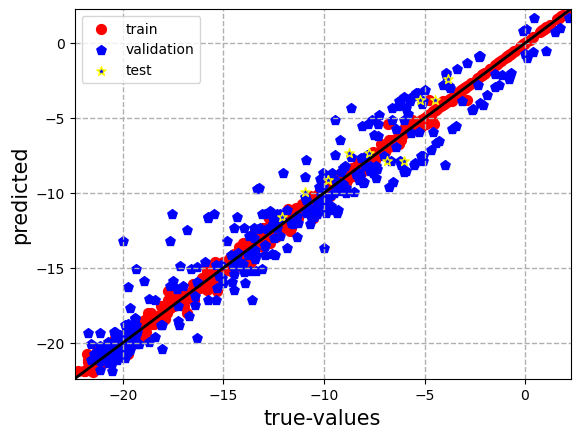

In [58]:
xx = scaler2.inverse_transform(y_train)[:,4]
yy = scaler2.inverse_transform(predicted_on_X_train)[:,4]
xx_validation = scaler2.inverse_transform(y_validation)[:,4]
yy_validation = scaler2.inverse_transform(predicted_on_X_validation)[:,4]
xx_test = scaler2.inverse_transform(y_test)[:,4]
yy_test = scaler2.inverse_transform(predicted_on_X_test)[:,4]
bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x2y2, 'k-', linewidth=2)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='train', marker='o', facecolors='red', edgecolors='red', s=50)
plt.scatter(xx_validation, yy_validation, label='validation', marker='p', facecolors='blue', edgecolors='blue', s=50)
plt.scatter(xx_test, yy_test, label='test', marker='*', facecolors='blue', edgecolors='yellow', s=50)
plt.legend(loc='best', fontsize=10)
plt.xlabel('true-values', fontsize=15)
plt.ylabel('predicted', fontsize=15)